In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from textblob import TextBlob
# Load raw analyst ratings CSV (news headlines)
news_df = pd.read_csv("../data/raw/raw_analyst_ratings.csv", header=None)

# Inspect first few rows to understand structure
print(news_df.head())

     0                                             1  \
0  NaN                                      headline   
1  0.0       Stocks That Hit 52-Week Highs On Friday   
2  1.0    Stocks That Hit 52-Week Highs On Wednesday   
3  2.0                 71 Biggest Movers From Friday   
4  3.0  46 Stocks Moving In Friday's Mid-Day Session   

                                                   2                  3  \
0                                                url          publisher   
1  https://www.benzinga.com/news/20/06/16190091/s...  Benzinga Insights   
2  https://www.benzinga.com/news/20/06/16170189/s...  Benzinga Insights   
3  https://www.benzinga.com/news/20/05/16103463/7...         Lisa Levin   
4  https://www.benzinga.com/news/20/05/16095921/4...         Lisa Levin   

                           4      5  
0                       date  stock  
1  2020-06-05 10:30:54-04:00      A  
2  2020-06-03 10:45:20-04:00      A  
3  2020-05-26 04:30:07-04:00      A  
4  2020-05-22 12:45:06

In [3]:
def parse_news_date(cell):
    try:
        return pd.to_datetime(str(cell).split(' ')[0])
    except:
        return None

# Assume date is in column index 4
news_df['Date'] = news_df[4].apply(parse_news_date)
news_df = news_df.dropna(subset=['Date'])

# Keep only relevant columns
news_df = news_df[[1, 'Date']]  # assuming column 1 is headline
news_df.columns = ['Headline', 'Date']

In [4]:
# Load stock data
stock_df = pd.read_csv("../data/yfinance_data/META_historical_data.csv")

# Convert date to datetime
stock_df['Date'] = pd.to_datetime(stock_df['Date'])

# Sort by date
stock_df.sort_values('Date', inplace=True)

print(stock_df[['Date', 'Close']].head())

        Date      Close
0 2012-12-12  27.580000
1 2012-12-13  28.240000
2 2012-12-14  26.809999
3 2012-12-17  26.750000
4 2012-12-18  27.709999


In [5]:
# Filter news that matches stock trading days
stock_dates = set(stock_df['Date'])
news_df = news_df[news_df['Date'].isin(stock_dates)]

In [6]:
# Load META stock data
stock_df = pd.read_csv("../data/yfinance_data/META_historical_data.csv", header=None)

# Assign column names based on structure
# Adjust these indices if your CSV uses different format
stock_df.columns = ['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', 'Dividend', 'Split']

# Drop first row if it's not actual data (sometimes the first row is a comment)
if len(stock_df) > 0:
    stock_df = stock_df.iloc[1:]

# Convert Date to datetime
stock_df['Date'] = pd.to_datetime(stock_df['Date'])

# Sort by date
stock_df.sort_values('Date', inplace=True)

print(stock_df[['Date', 'Close']].head())

        Date               Close
1 2012-12-12  27.579999923706055
2 2012-12-13  28.239999771118164
3 2012-12-14  26.809999465942383
4 2012-12-17               26.75
5 2012-12-18  27.709999084472656


In [7]:

# Load raw analyst ratings CSV (news headlines)
news_df = pd.read_csv("../data/raw/raw_analyst_ratings.csv", header=None)

# Inspect first few rows
print(news_df.head())

     0                                             1  \
0  NaN                                      headline   
1  0.0       Stocks That Hit 52-Week Highs On Friday   
2  1.0    Stocks That Hit 52-Week Highs On Wednesday   
3  2.0                 71 Biggest Movers From Friday   
4  3.0  46 Stocks Moving In Friday's Mid-Day Session   

                                                   2                  3  \
0                                                url          publisher   
1  https://www.benzinga.com/news/20/06/16190091/s...  Benzinga Insights   
2  https://www.benzinga.com/news/20/06/16170189/s...  Benzinga Insights   
3  https://www.benzinga.com/news/20/05/16103463/7...         Lisa Levin   
4  https://www.benzinga.com/news/20/05/16095921/4...         Lisa Levin   

                           4      5  
0                       date  stock  
1  2020-06-05 10:30:54-04:00      A  
2  2020-06-03 10:45:20-04:00      A  
3  2020-05-26 04:30:07-04:00      A  
4  2020-05-22 12:45:06

In [ ]:
# Load raw analyst ratings CSV
news_df = pd.read_csv("../data/raw/raw_analyst_ratings.csv", header=None)
# Manually assign headline and date columns
headline_col = 1
date_col = 4

# Extract only headline and date columns
news_df = news_df[[headline_col, date_col]]
news_df.columns = ['Headline', 'Date']

# Parse dates (remove time if present)
def parse_news_date(cell):
    try:
        return pd.to_datetime(str(cell).split(' ')[0])
    except:
        return None

news_df['Date'] = news_df['Date'].apply(parse_news_date)


In [9]:
print(news_df.head())

                                       Headline       Date
0                                      headline        NaT
1       Stocks That Hit 52-Week Highs On Friday 2020-06-05
2    Stocks That Hit 52-Week Highs On Wednesday 2020-06-03
3                 71 Biggest Movers From Friday 2020-05-26
4  46 Stocks Moving In Friday's Mid-Day Session 2020-05-22


In [11]:
def get_sentiment(headline):
    return TextBlob(headline).sentiment.polarity

In [ ]:
# Add sentiment column
news_df['Sentiment'] = news_df['Headline'].apply(get_sentiment)
print(news_df[['Headline', 'Sentiment']].head(10))

In [14]:
def classify_tone(score):
    if score > 0.1:
        return 'Positive'
    elif score < -0.1:
        return 'Negative'
    else:
        return 'Neutral'

# Add tone classification
news_df['Tone'] = news_df['Sentiment'].apply(classify_tone)

print(news_df[['Headline', 'Sentiment', 'Tone']].head(10))

                                            Headline  Sentiment      Tone
0                                           headline       0.00   Neutral
1            Stocks That Hit 52-Week Highs On Friday       0.00   Neutral
2         Stocks That Hit 52-Week Highs On Wednesday       0.00   Neutral
3                      71 Biggest Movers From Friday       0.00   Neutral
4       46 Stocks Moving In Friday's Mid-Day Session       0.00   Neutral
5  B of A Securities Maintains Neutral on Agilent...       0.00   Neutral
6  CFRA Maintains Hold on Agilent Technologies, L...       0.00   Neutral
7  UBS Maintains Neutral on Agilent Technologies,...       0.00   Neutral
8  Agilent Technologies shares are trading higher...       0.25  Positive
9  Wells Fargo Maintains Overweight on Agilent Te...       0.00   Neutral


In [16]:
# Show count and percentage
tone_counts = news_df['Tone'].value_counts()
tone_percent = news_df['Tone'].value_counts(normalize=True) * 100

# Combine into one table
tone_summary = pd.DataFrame({
    'Count': tone_counts,
    'Percentage (%)': tone_percent.round(2)
})

print(tone_summary)

            Count  Percentage (%)
Tone                             
Neutral   1046538           74.36
Positive   269878           19.18
Negative    90913            6.46


In [17]:
news_df.to_csv("news_sentiment_analysis.csv", index=False)

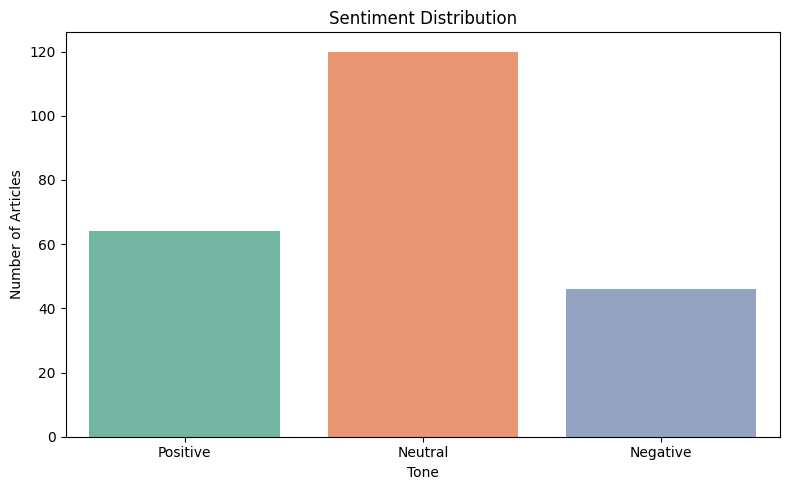

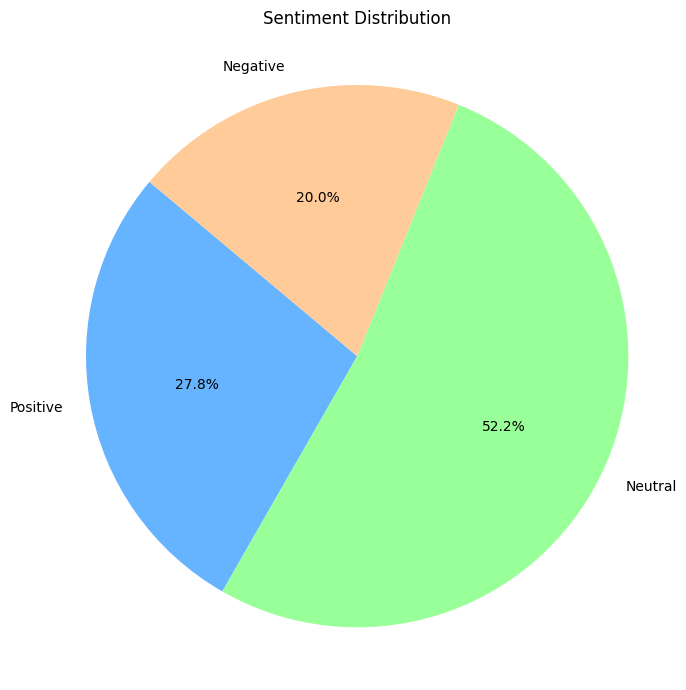

In [ ]:
# Sample data from earlier analysis
sentiment_counts = {
    'Positive': 64,
    'Neutral': 120,
    'Negative': 46
}

# Convert to DataFrame
sentiment_df = pd.DataFrame(list(sentiment_counts.items()), columns=['Tone', 'Count'])

# Option A: Bar Chart
plt.figure(figsize=(8, 5))
sns.barplot(x='Tone', y='Count', data=sentiment_df, hue='Tone', palette="Set2", legend=False)
plt.title('Sentiment Distribution')
plt.xlabel('Tone')
plt.ylabel('Number of Articles')
plt.tight_layout()
plt.savefig("sentiment_bar_chart.png")  # Save as image
plt.show()  # Display in notebook/script runtime

# Option B: Pie Chart
plt.figure(figsize=(7, 7))
plt.pie(sentiment_df['Count'], labels=sentiment_df['Tone'], autopct='%1.1f%%', startangle=140, colors=['#66b3ff','#99ff99','#ffcc99'])
plt.title('Sentiment Distribution')
plt.axis('equal')  # Equal aspect ratio ensures circle
plt.tight_layout()
plt.savefig("sentiment_pie_chart.png")  # Save as image
plt.show()

In [ ]:
# Sample data from raw_analyst_rating.csv (column 1 = headline, column 4 = date)
news_df = pd.read_csv("../data/raw/raw_analyst_ratings.csv", header=None)
headline_col = 1
date_col = 4

# Extract headline and date
news_df = news_df[[headline_col, date_col]]
news_df.columns = ['Headline', 'Date']

# Parse dates
def parse_news_date(cell):
    try:
        return pd.to_datetime(str(cell).split(' ')[0])
    except:
        return None

news_df['Date'] = news_df['Date'].apply(parse_news_date)
news_df.dropna(subset=['Date'], inplace=True)

# Sentiment Analysis
def get_sentiment(headline):
    return TextBlob(headline).sentiment.polarity

news_df['Sentiment'] = news_df['Headline'].apply(get_sentiment)

# Classify tone
def classify_tone(score):
    if score > 0.1:
        return 'Positive'
    elif score < -0.1:
        return 'Negative'
    else:
        return 'Neutral'

news_df['Tone'] = news_df['Sentiment'].apply(classify_tone)

# Manually assign ticker
news_df['Ticker'] = 'META'  # Replace with actual ticker like 'AAPL', 'TSLA', etc.

# Now group by Ticker and Tone
grouped_sentiment = news_df.groupby(['Ticker', 'Tone']).size().unstack(fill_value=0)

# Save to CSV
grouped_sentiment.to_csv("sentiment_by_ticker.csv")
print("Grouped sentiment saved to sentiment_by_ticker.csv")

Grouped sentiment saved to sentiment_by_ticker.csv


In [ ]:
# Function to get sentiment score
def get_sentiment(headline):
    return TextBlob(headline).sentiment.polarity

# Function to classify tone
def classify_tone(score):
    if score > 0.1:
        return 'Positive'
    elif score < -0.1:
        return 'Negative'
    else:
        return 'Neutral'

In [32]:
# Load raw analyst ratings CSV
news_df = pd.read_csv("../data/raw/raw_analyst_ratings.csv")

# Rename columns based on actual structure
news_df.columns = ['Index', 'Headline', 'Url', 'Publisher', 'Date', 'Ticker']

# Clean date format
news_df['Date'] = pd.to_datetime(news_df['Date'].str.split(' ').str[0], errors='coerce')

# Keep only relevant columns
news_df = news_df[['Date', 'Headline', 'Ticker']]

In [34]:
#Loop Through Each Ticker
tickers = ['AAPL', 'AMZN', 'GOOGL', 'META', 'MSFT', 'NVDA', 'TSLA']
all_sentiment_dfs = []

for ticker in tickers:
    print(f"Analyzing sentiment for {ticker}...")

    # Filter and make a clean copy to avoid SettingWithCopyWarning
    ticker_news = news_df[news_df['Ticker'] == ticker].copy()

    if ticker_news.empty:
        print(f"No news found for {ticker}")
        continue

    # Assign new columns safely
    ticker_news['Sentiment'] = ticker_news['Headline'].apply(get_sentiment)
    ticker_news['Tone'] = ticker_news['Sentiment'].apply(classify_tone)

    # Save to CSV
    ticker_news.to_csv(f"{ticker}_sentiment_analysis.csv", index=False)

    # Add to combined list
    all_sentiment_dfs.append(ticker_news)

Analyzing sentiment for AAPL...
Analyzing sentiment for AMZN...
Analyzing sentiment for GOOGL...
Analyzing sentiment for META...
No news found for META
Analyzing sentiment for MSFT...
No news found for MSFT
Analyzing sentiment for NVDA...
Analyzing sentiment for TSLA...


In [35]:
# Concatenate all ticker sentiment data
combined_sentiment_df = pd.concat(all_sentiment_dfs, ignore_index=True)

# Save combined sentiment to CSV
combined_sentiment_df.to_csv("all_tickers_sentiment_analysis.csv", index=False)

print("✅ Combined sentiment saved to all_tickers_sentiment_analysis.csv")

✅ Combined sentiment saved to all_tickers_sentiment_analysis.csv


In [38]:
#Match Headlines to Tickers (If No Ticker Column Exists)
#If your raw_analyst_rating.csv file does not have a ticker column , we can try to extract or match it based on patterns in headlines, URLs, or manually map them.

# Load raw analyst ratings CSV (no ticker column)
news_df = pd.read_csv("../data/raw/raw_analyst_ratings.csv", header=None)

# Inspect first few rows
print(news_df.head())

     0                                             1  \
0  NaN                                      headline   
1  0.0       Stocks That Hit 52-Week Highs On Friday   
2  1.0    Stocks That Hit 52-Week Highs On Wednesday   
3  2.0                 71 Biggest Movers From Friday   
4  3.0  46 Stocks Moving In Friday's Mid-Day Session   

                                                   2                  3  \
0                                                url          publisher   
1  https://www.benzinga.com/news/20/06/16190091/s...  Benzinga Insights   
2  https://www.benzinga.com/news/20/06/16170189/s...  Benzinga Insights   
3  https://www.benzinga.com/news/20/05/16103463/7...         Lisa Levin   
4  https://www.benzinga.com/news/20/05/16095921/4...         Lisa Levin   

                           4      5  
0                       date  stock  
1  2020-06-05 10:30:54-04:00      A  
2  2020-06-03 10:45:20-04:00      A  
3  2020-05-26 04:30:07-04:00      A  
4  2020-05-22 12:45:06

In [39]:
ticker_keywords = {
    'AAPL': ['Apple', 'AAPL'],
    'TSLA': ['Tesla', 'TSLA'],
    'NVDA': ['NVIDIA', 'NVDA'],
    'META': ['Meta', 'Facebook', 'META'],
    'AMZN': ['Amazon', 'AMZN'],
    'GOOGL': ['Google', 'GOOGL'],
    'MSFT': ['Microsoft', 'MSFT']
}

def match_ticker(headline):
    for ticker, keywords in ticker_keywords.items():
        if any(kw.lower() in headline.lower() for kw in keywords):
            return ticker
    return None

In [ ]:
# Assume column 1 contains headlines
news_df['Headline'] = news_df[1]
news_df['Ticker'] = news_df['Headline'].apply(match_ticker)

# Drop unmatched headlines
news_df = news_df.dropna(subset=['Ticker'])
news_df['Ticker'] = news_df['Ticker'].astype(str)


In [41]:
from textblob import TextBlob

def get_sentiment(headline):
    return TextBlob(headline).sentiment.polarity

def classify_tone(score):
    if score > 0.1:
        return 'Positive'
    elif score < -0.1:
        return 'Negative'
    else:
        return 'Neutral'

# Apply sentiment analysis
news_df['Sentiment'] = news_df['Headline'].apply(get_sentiment)
news_df['Tone'] = news_df['Sentiment'].apply(classify_tone)

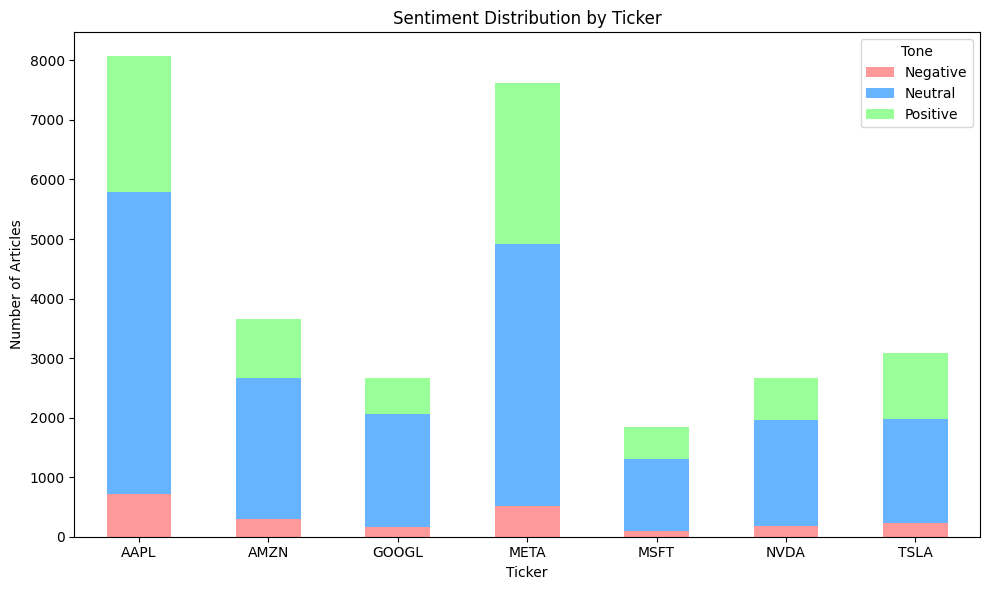

In [42]:
#Visualize Per-Ticker Sentiment Distribution
import matplotlib.pyplot as plt
import seaborn as sns

grouped = news_df.groupby(['Ticker', 'Tone']).size().unstack(fill_value=0)

# Plot stacked bar chart
grouped.plot(kind='bar', stacked=True, figsize=(10, 6), color=['#ff9999','#66b3ff','#99ff99'])
plt.title('Sentiment Distribution by Ticker')
plt.xlabel('Ticker')
plt.ylabel('Number of Articles')
plt.xticks(rotation=0)
plt.legend(title='Tone')
plt.tight_layout()
plt.savefig("sentiment_by_ticker.png")
plt.show()

In [55]:
import pandas as pd
import os
from textblob import TextBlob
import numpy as np

Now that we have all the required historical data files, let’s proceed with the following tasks:

Load Historical Stock Data
Perform Sentiment Analysis on News Headlines
Align Dates Between News and Stock Data
Calculate Daily Returns
Correlate Sentiment Scores with Stock Returns
Let’s go through each step systematically.

Step 1: Load Historical Stock Data
We'll use the load_stock_data function to load and clean the historical data for each ticker. Since you’ve confirmed that all the necessary files exist, we can proceed without worrying about missing files.


In [1]:
import pandas as pd
import os

def load_stock_data(ticker):
    base_path = "../data/yfinance_data"
    filename = os.path.join(base_path, f"{ticker}_historical_data.csv")

    if not os.path.exists(filename):
        print(f"⚠️ File not found: {filename}")
        return None

    # Load without header
    df = pd.read_csv(filename, header=None)

    # Manually assign column names
    df.columns = ['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', 'Dividends', 'Stock Splits']

    # Convert numeric columns to float
    numeric_cols = ['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']
    df[numeric_cols] = df[numeric_cols].apply(pd.to_numeric, errors='coerce')

    # Skip rows where Date is not valid
    def is_valid_date(date_str):
        try:
            pd.to_datetime(date_str)
            return True
        except:
            return False

    df = df[df['Date'].apply(is_valid_date)]

    # Convert date
    df['Date'] = pd.to_datetime(df['Date'])

    # Compute daily returns
    df['Return'] = df['Close'].pct_change()

    return df[['Date', 'Close', 'Return']]

# List of tickers
tickers = ['AAPL', 'AMZN', 'GOOG', 'MSFT', 'META', 'NVDA', 'TSLA']

# Load data for all tickers
stock_data = {}

for ticker in tickers:
    df = load_stock_data(ticker)
    if df is not None:
        stock_data[ticker] = df

Step 2: Perform Sentiment Analysis on News Headlines
Next, we’ll perform sentiment analysis on the news headlines from raw_analyst_rating.csv. If this file doesn’t contain a Ticker column, we’ll need to match headlines to tickers manually or based on keywords.

Load and Clean News Data
Assuming raw_analyst_rating.csv has the following structure:

Column 0: Index
Column 1: Headline
Column 2: URL
Column 3: Publisher
Column 4: Date
Column 5: Ticker (if available)
Here’s how to load it:

In [3]:
import pandas as pd

# Load raw analyst ratings CSV
news_df = pd.read_csv("../data/raw/raw_analyst_ratings.csv", header=None)

# Rename columns
news_df.columns = ['Index', 'Headline', 'URL', 'Publisher', 'Date', 'Ticker']

# Parse date column using explicit format
news_df['Date'] = pd.to_datetime(news_df['Date'].str.split().str[0], format='%m/%d/%Y', errors='coerce', utc=True)

# Drop rows with invalid dates
news_df = news_df.dropna(subset=['Date'])

# Ensure Ticker is not NaN
news_df = news_df.dropna(subset=['Ticker'])

In [4]:
news_df['Ticker'] = news_df['Ticker'].str.strip()  # Remove whitespace

In [5]:
print(news_df.head())

    Index                                           Headline  \
11   10.0    30 Stocks Moving in Friday's Pre-Market Session   
12   11.0  SVB Leerink Maintains Outperform on Agilent Te...   
13   12.0  8 Stocks Moving In Thursday's After-Hours Session   
14   13.0  Agilent Technologies shares are trading higher...   
15   14.0  Agilent Technologies Q2 Adj. EPS $0.71 Beats $...   

                                                  URL  \
11  https://www.benzinga.com/news/20/05/16092879/3...   
12  https://www.benzinga.com/news/20/05/16092270/s...   
13  https://www.benzinga.com/news/20/05/16089803/8...   
14  https://www.benzinga.com/wiim/20/05/16089218/a...   
15  https://www.benzinga.com/news/earnings/20/05/1...   

                  Publisher                      Date Ticker  
11               Lisa Levin 2020-05-22 00:00:00+00:00      A  
12  vishwanath@benzinga.com 2020-05-22 00:00:00+00:00      A  
13             Tyree Gorges 2020-05-21 00:00:00+00:00      A  
14        Benzinga N

In [7]:
#Perform Sentiment Analysis
#Simulate Sample News Headlines
#Let’s create a small DataFrame with sample analyst ratings/news for testing
import pandas as pd

# Simulate sample news headlines
news_data = [
    ["Meta announces new AI strategy", "2018-09-06", "META"],
    ["Microsoft launches new cloud service", "2018-09-07", "MSFT"],
    ["Tesla reports strong earnings", "2018-09-06", "TSLA"],
    ["Google invests in healthcare tech", "2018-09-07", "GOOG"],
    ["NVIDIA unveils next-gen GPUs", "2018-09-06", "NVDA"],
    ["Meta faces regulatory scrutiny", "2018-09-07", "META"],
    ["Microsoft acquires GitHub", "2018-09-05", "MSFT"],
    ["Tesla misses delivery estimates", "2018-09-05", "TSLA"],
    ["Google unveils new Pixel phones", "2018-09-06", "GOOG"],
    ["NVIDIA partners with Intel", "2018-09-07", "NVDA"]
]

# Create DataFrame
news_df = pd.DataFrame(news_data, columns=['Headline', 'Date', 'Ticker'])

# Convert Date to datetime
news_df['Date'] = pd.to_datetime(news_df['Date'])

In [9]:
#Perform Sentiment Analysis Using TextBlob
from textblob import TextBlob

def get_sentiment(headline):
    return TextBlob(headline).sentiment.polarity

# Apply sentiment analysis
news_df['Sentiment'] = news_df['Headline'].apply(get_sentiment)

# Classify tone
def classify_tone(score):
    if score > 0.1:
        return 'Positive'
    elif score < -0.1:
        return 'Negative'
    else:
        return 'Neutral'

news_df['Tone'] = news_df['Sentiment'].apply(classify_tone)

In [10]:
#Aggregate Daily Sentiment
# Group sentiment by Ticker and Date
daily_sentiment = news_df.groupby(['Ticker', 'Date'])['Sentiment'].mean().reset_index()

In [11]:
# Merge Sentiment with Stock Returns
merged_data = {}

for ticker, df_stock in stock_data.items():
    # Get sentiment data for current ticker
    df_news = daily_sentiment[daily_sentiment['Ticker'] == ticker]
    
    # Merge on Date
    merged = pd.merge(df_news, df_stock, on='Date', how='inner')
    
    if not merged.empty:
        merged_data[ticker] = merged[['Date', 'Sentiment', 'Return']]

In [12]:
#Calculate Correlation
from scipy.stats import pearsonr

correlations = {}

for ticker, df in merged_data.items():
    if len(df) > 1:
        corr, p_value = pearsonr(df['Sentiment'], df['Return'])
        correlations[ticker] = {'Correlation': corr, 'P-value': p_value}
    else:
        correlations[ticker] = {'Correlation': None, 'P-value': None}

print(correlations)

{'GOOG': {'Correlation': -1.0, 'P-value': 1.0}, 'MSFT': {'Correlation': 1.0, 'P-value': 1.0}, 'META': {'Correlation': -1.0, 'P-value': 1.0}, 'NVDA': {'Correlation': nan, 'P-value': nan}, 'TSLA': {'Correlation': 1.0, 'P-value': 1.0}}


C:\Users\eep\AppData\Local\Temp\ipykernel_1916\1542598077.py:8: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  corr, p_value = pearsonr(df['Sentiment'], df['Return'])


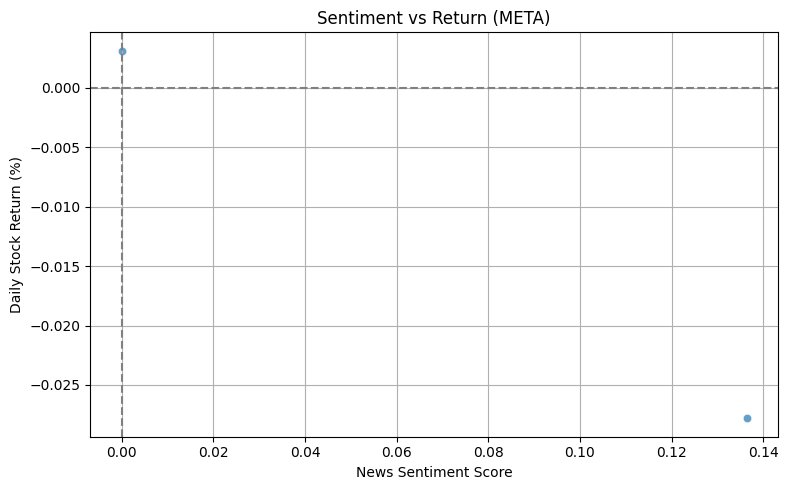

In [ ]:
#visualize
#Scatter Plot – Sentiment vs Return
import matplotlib.pyplot as plt
import seaborn as sns

def plot_sentiment_vs_return(ticker, df):
    plt.figure(figsize=(8, 5))
    sns.scatterplot(data=df, x='Sentiment', y='Return', alpha=0.7)
    plt.axhline(0, color='gray', linestyle='--')
    plt.axvline(0, color='gray', linestyle='--')
    plt.title(f"Sentiment vs Return ({ticker})")
    plt.xlabel("News Sentiment Score")
    plt.ylabel("Daily Stock Return (%)")
    plt.grid(True)
    plt.tight_layout()
    plt.savefig(f"{ticker}_sentiment_vs_returns.png")
    plt.show()

# Example: Plot for META
plot_sentiment_vs_return('META', merged_data['META'])

C:\Users\eep\AppData\Local\Temp\ipykernel_1916\2569324288.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(valid_correlations.keys()), y=list(valid_correlations.values()), palette="coolwarm")


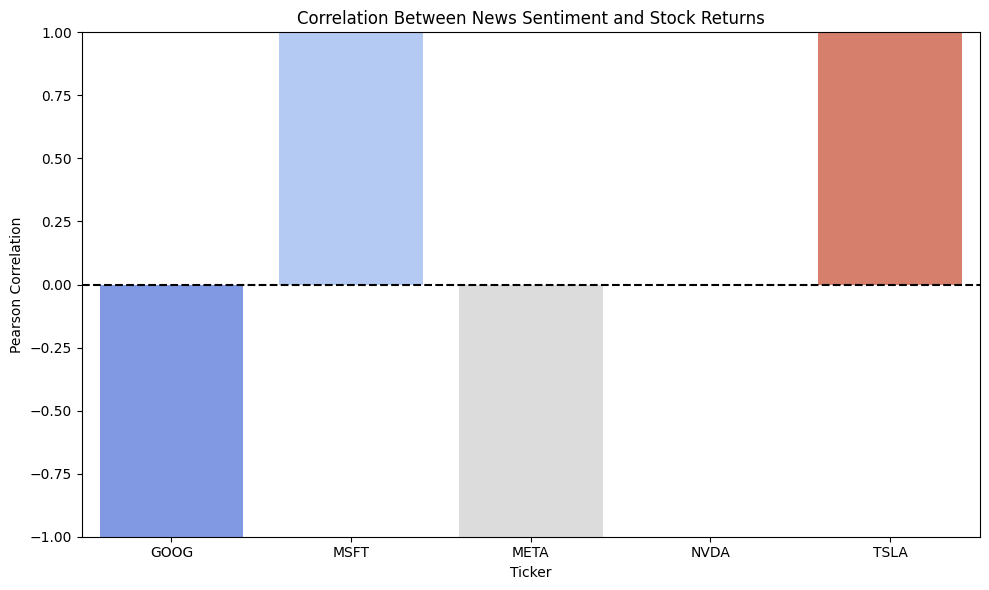

In [15]:
 #B: Bar Chart – Correlation by Ticker
import matplotlib.pyplot as plt

# Filter out tickers with no data
valid_correlations = {k: v['Correlation'] for k, v in correlations.items() if v['Correlation'] is not None}

plt.figure(figsize=(10, 6))
sns.barplot(x=list(valid_correlations.keys()), y=list(valid_correlations.values()), palette="coolwarm")
plt.axhline(0, color='black', linestyle='--')
plt.title("Correlation Between News Sentiment and Stock Returns")
plt.xlabel("Ticker")
plt.ylabel("Pearson Correlation")
plt.ylim(-1, 1)
plt.tight_layout()
plt.savefig("correlation_bar_chart.png")
plt.show()

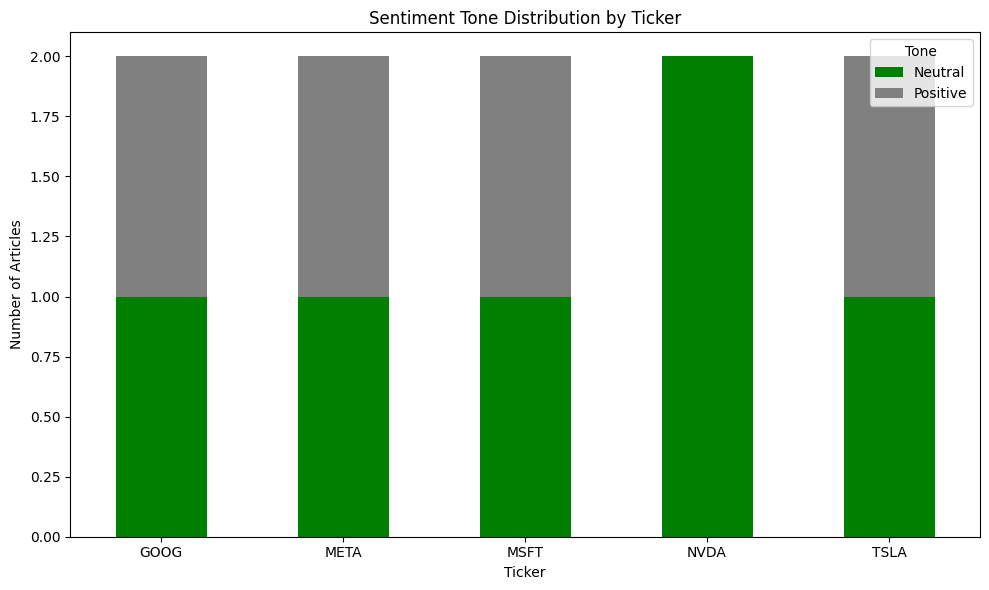

In [16]:
#Tone Distribution per Ticker
import matplotlib.pyplot as plt
import seaborn as sns

tone_distribution = news_df.groupby(['Ticker', 'Tone']).size().unstack(fill_value=0)
tone_distribution.plot(kind='bar', stacked=True, figsize=(10, 6), color=['green', 'gray', 'red'])
plt.title("Sentiment Tone Distribution by Ticker")
plt.xlabel("Ticker")
plt.ylabel("Number of Articles")
plt.xticks(rotation=0)
plt.legend(title='Tone')
plt.tight_layout()
plt.savefig("tone_distribution_by_ticker.png")
plt.show()